In [92]:
import numpy as np
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from scipy import stats as st
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('legend',fontsize=24)
plt.rc('axes', labelsize=24) 

In [51]:
def get_results(model_name, context="", n=3):
    if context:
        # To get results from individual models. 
        iter_files =glob.glob("results/{}/{}/results_checkpoint_{}_{}_iter_*.json".format(model_name, context, model_name, context))
    else:
        # To get results from combined models.  
        iter_files = glob.glob("results/{}/results_checkpoint_{}__iter_*.json".format(model_name, model_name))
    assert len(iter_files) == n

    # Check for all 3 iterations of models with different weight intialisations
    iters_results_df = []
    for iter_file in iter_files:
        with open(iter_file) as iter_f:
            iter_file_json = json.load(iter_f)
            # Get names of all contexts. 
            context_keys = sorted(list(dict(iter_file_json).keys()))
            results_dict = dict()
            # Get results from each context. 
            for key in context_keys:
                results_dict[key] = iter_file_json[key]["AUC"] 
            # Put results from this column into a dataframe 
            results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=[model_name])
            # Add this column to a list for every iteration
            iters_results_df.append(results_df)
    #Get the mean of all the mean of all the iterations.
    return pd.concat(iters_results_df).groupby(level=0).mean()


In [52]:
def get_results_print(model_name, context="", n=3):
    if context:
        # To get results from individual models. 
        iter_files =glob.glob("results/{}/{}/results_checkpoint_{}_{}_iter_*.json".format(model_name, context, model_name, context))
    else:
        # To get results from combined models.  
        iter_files = glob.glob("results/{}/results_checkpoint_{}__iter_*.json".format(model_name, model_name))
    assert len(iter_files) == n
    # Check for all 3 iterations of models with different weight intialisations
    iters_results_df = []
    for iter_file in iter_files:
        with open(iter_file) as iter_f:
            iter_file_json = json.load(iter_f)
            # Get names of all contexts. 
            context_keys = sorted(list(dict(iter_file_json).keys()))
            results_dict = dict()
            # Get results from each context. 
            for key in context_keys:
                results_dict[key] = iter_file_json[key]["AUC"] 
            # Put results from this column into a dataframe 
            results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=[model_name])
            # Add this column to a list for every iteration
            iters_results_df.append(results_df)

    mean =  pd.concat(iters_results_df).groupby(level=0).mean().round(3)
    se = pd.concat(iters_results_df).groupby(level=0).sem()
    std = pd.concat(iters_results_df).groupby(level=0).std().round(3)
    ci = st.t.interval(alpha=0.95, df=n-1, loc=mean, scale=se)
    print("mean", mean)
    print("std", std)
    print("se", se)
    print('ci', ci)
    ci_upper = ci[0].round(3).astype(str)
    ci_lower = ci[1].round(3).astype(str)
    print(mean.astype(str)+" ("+ci_upper+"-"+ci_lower+")")

#    return mean.astype(str)+" ("+ci_upper+"-"+ci_lower+")"
    return mean.astype(str)+"±"+(mean - ci[0]).round(3).astype(str)



In [53]:
model_names = [
               'AE_sound_all', 
               'AE_sound_FiLM_one_hot',
               'AE_sound_FiLM_embed_32',
               'AE_sound_FiLM_embed_64',
               'AE_sound_FiLM_embed_128',
               'AE_sound_FiLM_embed_256'
            ]
# Go through the combined model first.
results_list = []
for model_name in model_names:
    results_list.append(get_results(model_name))
single_model_list = []
# Go through the individual models section. 
for i in range(16):
    single_model_list.append(get_results("AE_sound", context=str(i)))
single_model_results = pd.concat(single_model_list)
results_df = pd.concat([single_model_results]+results_list, axis=1)
results_df


,AE_sound,AE_sound_all,AE_sound_FiLM_one_hot,AE_sound_FiLM_embed_32,AE_sound_FiLM_embed_64,AE_sound_FiLM_embed_128,AE_sound_FiLM_embed_256
fan_0_0dB,0.616174,0.589729,0.615468,0.622427,0.614699,0.633047,0.607145
fan_0_6dB,0.816429,0.700737,0.773916,0.786953,0.786967,0.779111,0.720252
fan_0_min6dB,0.556089,0.551353,0.551081,0.549368,0.543949,0.564215,0.546257
fan_1_0dB,0.880383,0.741764,0.867069,0.867133,0.872565,0.891525,0.811607
fan_1_6dB,0.976694,0.939875,0.957281,0.946734,0.944587,0.947753,0.859910
fan_1_min6dB,0.693995,0.558367,0.710676,0.727273,0.733219,0.722452,0.679482
fan_2_0dB,0.759413,0.711512,0.783415,0.803293,0.806635,0.785515,0.719748
fan_2_6dB,0.896689,0.895426,0.939317,0.934222,0.931857,0.916788,0.744148
fan_2_min6dB,0.589083,0.536454,0.567836,0.583922,0.588472,0.570989,0.559525
fan_3_0dB,0.974591,0.796405,0.957776,0.989597,0.984858,0.989933,0.943949


In [54]:
model_names = [
               'AE_sound_all', 
               'AE_sound_FiLM_one_hot',
               'AE_sound_FiLM_embed_32',
               'AE_sound_FiLM_embed_64',
               'AE_sound_FiLM_embed_128',
               'AE_sound_FiLM_embed_256'
            ]
# Go through the combined model first.
results_list_print = []
for model_name in model_names:
    results_list_print.append(get_results_print(model_name))
single_model_list_print = []
# Go through the individual models section. 
for i in range(16):
    single_model_list_print.append(get_results_print("AE_sound", context=str(i)))
single_model_results_print = pd.concat(single_model_list_print)
results_df_print = pd.concat([single_model_results_print]+results_list_print, axis=1)
results_df_print 


mean                   AE_sound_all
fan_0_0dB                0.590
fan_0_6dB                0.701
fan_0_min6dB             0.551
fan_1_0dB                0.742
fan_1_6dB                0.940
fan_1_min6dB             0.558
fan_2_0dB                0.712
fan_2_6dB                0.895
fan_2_min6dB             0.536
fan_3_0dB                0.796
fan_3_6dB                0.941
fan_3_min6dB             0.581
pump_4_0dB               0.423
pump_4_6dB               0.460
pump_4_min6dB            0.515
pump_5_0dB               0.432
pump_5_6dB               0.336
pump_5_min6dB            0.509
pump_6_0dB               0.713
pump_6_6dB               0.802
pump_6_min6dB            0.696
pump_7_0dB               0.651
pump_7_6dB               0.758
pump_7_min6dB            0.534
slider_10_0dB            0.788
slider_10_6dB            0.817
slider_10_min6dB         0.660
slider_11_0dB            0.625
slider_11_6dB            0.836
slider_11_min6dB         0.544
slider_8_0dB             0.978
sli

mean               AE_sound
fan_3_0dB        0.975
fan_3_6dB        0.997
fan_3_min6dB     0.817
std               AE_sound
fan_3_0dB        0.006
fan_3_6dB        0.002
fan_3_min6dB     0.009
se               AE_sound
fan_3_0dB     0.003245
fan_3_6dB     0.001271
fan_3_min6dB  0.005074
ci (array([[0.96103932],
       [0.99153322],
       [0.79516922]]), array([[0.98896068],
       [1.00246678],
       [0.83883078]]))
                         AE_sound
fan_3_0dB     0.975 (0.961-0.989)
fan_3_6dB     0.997 (0.992-1.002)
fan_3_min6dB  0.817 (0.795-0.839)
mean                AE_sound
pump_4_0dB        0.552
pump_4_6dB        0.684
pump_4_min6dB     0.590
std                AE_sound
pump_4_0dB        0.016
pump_4_6dB        0.018
pump_4_min6dB     0.011
se                AE_sound
pump_4_0dB     0.009491
pump_4_6dB     0.010404
pump_4_min6dB  0.006491
ci (array([[0.5111653 ],
       [0.63923462],
       [0.56207174]]), array([[0.5928347 ],
       [0.72876538],
       [0.61792826]]))
        

,AE_sound,AE_sound_all,AE_sound_FiLM_one_hot,AE_sound_FiLM_embed_32,AE_sound_FiLM_embed_64,AE_sound_FiLM_embed_128,AE_sound_FiLM_embed_256
fan_0_0dB,0.616±0.033,0.59±0.004,0.615±0.044,0.622±0.074,0.615±0.041,0.633±0.018,0.607±0.099
fan_0_6dB,0.816±0.044,0.701±0.066,0.774±0.024,0.787±0.022,0.787±0.058,0.779±0.024,0.72±0.254
fan_0_min6dB,0.556±0.034,0.551±0.018,0.551±0.043,0.549±0.056,0.544±0.04,0.564±0.005,0.546±0.051
fan_1_0dB,0.88±0.023,0.742±0.184,0.867±0.052,0.867±0.021,0.873±0.054,0.892±0.06,0.812±0.201
fan_1_6dB,0.977±0.022,0.94±0.015,0.957±0.058,0.947±0.015,0.945±0.088,0.948±0.045,0.86±0.362
fan_1_min6dB,0.694±0.015,0.558±0.079,0.711±0.031,0.727±0.014,0.733±0.014,0.722±0.008,0.679±0.155
fan_2_0dB,0.759±0.223,0.712±0.074,0.783±0.024,0.803±0.002,0.807±0.017,0.786±0.029,0.72±0.328
fan_2_6dB,0.897±0.219,0.895±0.071,0.939±0.013,0.934±0.01,0.932±0.027,0.917±0.027,0.744±0.791
fan_2_min6dB,0.589±0.005,0.536±0.033,0.568±0.021,0.584±0.007,0.588±0.011,0.571±0.031,0.56±0.09
fan_3_0dB,0.975±0.014,0.796±0.127,0.958±0.017,0.99±0.01,0.985±0.022,0.99±0.003,0.944±0.192


In [55]:
with open("machine_ids_map", "r") as f:
    machine_id_map = json.load(f)
inv_machine_id_map = {v: k for k, v in machine_id_map.items()}
# Get the machine names etc. in a nicer format. 
results_df[["Machine Name", "id", "SNR"]] = pd.DataFrame([x.split('_') for x in results_df.index.tolist()], index=results_df.index)
results_df["ID"] = pd.to_numeric(results_df["id"])
results_df["ID"] = results_df["ID"].map(inv_machine_id_map)
results_df["ID"] = pd.DataFrame([x.split('_')[-1] for x in results_df["ID"].tolist()], index=results_df.index)
results_df


,AE_sound,AE_sound_all,AE_sound_FiLM_one_hot,AE_sound_FiLM_embed_32,AE_sound_FiLM_embed_64,AE_sound_FiLM_embed_128,AE_sound_FiLM_embed_256,Machine Name,id,SNR,ID
fan_0_0dB,0.616174,0.589729,0.615468,0.622427,0.614699,0.633047,0.607145,fan,0,0dB,00
fan_0_6dB,0.816429,0.700737,0.773916,0.786953,0.786967,0.779111,0.720252,fan,0,6dB,00
fan_0_min6dB,0.556089,0.551353,0.551081,0.549368,0.543949,0.564215,0.546257,fan,0,min6dB,00
fan_1_0dB,0.880383,0.741764,0.867069,0.867133,0.872565,0.891525,0.811607,fan,1,0dB,02
fan_1_6dB,0.976694,0.939875,0.957281,0.946734,0.944587,0.947753,0.859910,fan,1,6dB,02
fan_1_min6dB,0.693995,0.558367,0.710676,0.727273,0.733219,0.722452,0.679482,fan,1,min6dB,02
fan_2_0dB,0.759413,0.711512,0.783415,0.803293,0.806635,0.785515,0.719748,fan,2,0dB,04
fan_2_6dB,0.896689,0.895426,0.939317,0.934222,0.931857,0.916788,0.744148,fan,2,6dB,04
fan_2_min6dB,0.589083,0.536454,0.567836,0.583922,0.588472,0.570989,0.559525,fan,2,min6dB,04
fan_3_0dB,0.974591,0.796405,0.957776,0.989597,0.984858,0.989933,0.943949,fan,3,0dB,06


In [57]:
print(st.wilcoxon(results_df.AE_sound, results_df.AE_sound_FiLM_embed_64))

WilcoxonResult(statistic=510.0, pvalue=0.4237047023124034)


In [58]:
rank_results_df = results_df[
          ["AE_sound_all", 
           "AE_sound_FiLM_one_hot", 
           "AE_sound_FiLM_embed_32",
           "AE_sound_FiLM_embed_64",
           "AE_sound_FiLM_embed_128",
           "AE_sound_FiLM_embed_256"
          ]
        ].rank(1, ascending=False, method='first')
# Rank all combined models. 
mean_rank_row = rank_results_df.mean().to_frame().T
mean_rank_row = mean_rank_row.rename(index={0: 'average rank'})
results_and_ranks_df = pd.concat([results_df, mean_rank_row])
results_and_ranks_df

,AE_sound,AE_sound_all,AE_sound_FiLM_one_hot,AE_sound_FiLM_embed_32,AE_sound_FiLM_embed_64,AE_sound_FiLM_embed_128,AE_sound_FiLM_embed_256,Machine Name,id,SNR,ID
fan_0_0dB,0.616174,0.589729,0.615468,0.622427,0.614699,0.633047,0.607145,fan,0,0dB,00
fan_0_6dB,0.816429,0.700737,0.773916,0.786953,0.786967,0.779111,0.720252,fan,0,6dB,00
fan_0_min6dB,0.556089,0.551353,0.551081,0.549368,0.543949,0.564215,0.546257,fan,0,min6dB,00
fan_1_0dB,0.880383,0.741764,0.867069,0.867133,0.872565,0.891525,0.811607,fan,1,0dB,02
fan_1_6dB,0.976694,0.939875,0.957281,0.946734,0.944587,0.947753,0.859910,fan,1,6dB,02
fan_1_min6dB,0.693995,0.558367,0.710676,0.727273,0.733219,0.722452,0.679482,fan,1,min6dB,02
fan_2_0dB,0.759413,0.711512,0.783415,0.803293,0.806635,0.785515,0.719748,fan,2,0dB,04
fan_2_6dB,0.896689,0.895426,0.939317,0.934222,0.931857,0.916788,0.744148,fan,2,6dB,04
fan_2_min6dB,0.589083,0.536454,0.567836,0.583922,0.588472,0.570989,0.559525,fan,2,min6dB,04
fan_3_0dB,0.974591,0.796405,0.957776,0.989597,0.984858,0.989933,0.943949,fan,3,0dB,06


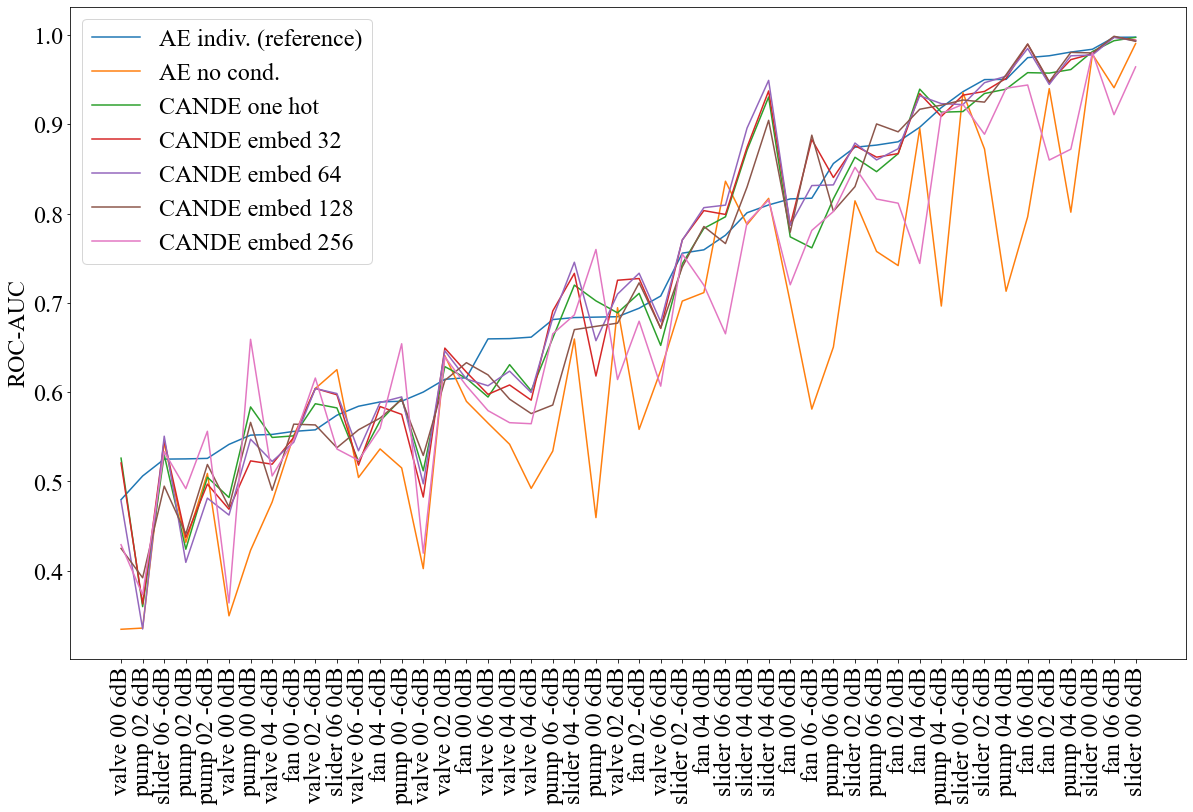

In [93]:
formatted_col_map_plot= {
           "AE_sound": "AE indiv. (reference)",
           "AE_sound_all":            "AE no cond.", 
           "AE_sound_FiLM_one_hot"  : "CANDE one hot",  
           "AE_sound_FiLM_embed_32":  "CANDE embed 32",
           "AE_sound_FiLM_embed_64":  "CANDE embed 64",
           "AE_sound_FiLM_embed_128": "CANDE embed 128",
           "AE_sound_FiLM_embed_256": "CANDE embed 256"
}


cols_to_plot = ["AE indiv. (reference)", 
                "AE no cond.",
                "CANDE one hot",
                "CANDE embed 32",
                "CANDE embed 64",
                "CANDE embed 128",
                "CANDE embed 256"
               ]
plt_results = results_df.sort_values(by="AE_sound")
plt_results = plt_results.rename(columns=formatted_col_map_plot, errors="raise")
plt_results[["Machine Name", "id", "SNR"]] = pd.DataFrame([x.split('_') for x in plt_results.index.tolist()], index=plt_results.index)
plt_results_labels = plt_results["Machine Name"]+' '+plt_results["ID"].astype(str)+" "+plt_results["SNR"]
plt_results_labels = [s.replace('min', '-') for s in plt_results_labels ]
plt_results_ax = plt_results[cols_to_plot].plot(figsize=(20, 12))
plt_results_ax.set_xticks(np.arange(len(plt_results)))
plt_results_ax.set_ylabel("ROC-AUC")
plt_results_ax.tick_params(axis='both', which='major', labelsize=24)
plt_results_ax.set_xticklabels(plt_results_labels, rotation=90)
plt.savefig("figs/CANDE-MIMII-ROC-AUC.png")


In [83]:
pc_diff_AE_sound = pd.concat([results_df.AE_sound, results_df.AE_sound_FiLM_embed_64], axis=1).pct_change(axis='columns')
mean_pc_diff_AE_sound_oracle = pc_diff_AE_sound.AE_sound_FiLM_embed_64.mean()
std_pc_diff_AE_sound_oracle = pc_diff_AE_sound.AE_sound_FiLM_embed_64.std()
print(mean_pc_diff_AE_sound_oracle, std_pc_diff_AE_sound_oracle)
print(wilcoxon(results_df.AE_sound, results_df.AE_sound_FiLM_embed_64))



-0.014297129167842823 0.08324073348008752
WilcoxonResult(statistic=510.0, pvalue=0.4237047023124034)


In [84]:
subset_df =  results_df[
          [
               "Machine Name",
               "ID",
               'AE_sound',
                  "AE_sound_all", 
               "AE_sound_FiLM_one_hot", 
               "AE_sound_FiLM_embed_32",
               "AE_sound_FiLM_embed_64",
               "AE_sound_FiLM_embed_128",
               "AE_sound_FiLM_embed_256"

            ]].groupby(["Machine Name","ID"]).mean()
subset_df



AE_sound  AE_sound_all  AE_sound_FiLM_one_hot  \
Machine Name ID                                                  
fan          00  0.662898      0.613939               0.646821   
             02  0.850358      0.746669               0.845009   
             04  0.748395      0.714464               0.763522   
             06  0.929727      0.772787               0.904311   
pump         00  0.608614      0.465907               0.626197   
             02  0.519114      0.425570               0.429628   
             04  0.949911      0.737011               0.938022   
             06  0.804680      0.647411               0.774713   
slider       00  0.972650      0.968002               0.964320   
             02  0.859975      0.796183               0.847090   
             04  0.764718      0.754747               0.840487   
             06  0.625005      0.668364               0.636185   
valve        00  0.540459      0.362196               0.506728   
             02  0.618935      0.646566               0.634853   
             04  0.624784      0.503650               0.593920   
             06  0.650540      0.564730               0.589815   

                 AE_sound_FiLM_embed_32  AE_sound_FiLM_embed_64  \
Machine Name ID                                                   
fan          00                0.652916                0.648539   
             02                0.847047                0.850124   
             04                0.773812                0.775655   
             06                0.956749                0.937839   
pump         00                0.572090                0.599915   
             02                0.432459                0.408580   
             04                0.944167                0.951178   
             06                0.798155                0.791768   
slider       00                0.968498                0.964328   
             02                0.861083                0.865271   
             04                0.848220                0.863457   
             06                0.647421                0.652892   
valve        00                0.490737                0.479376   
             02                0.659653                0.653426   
             04                0.572840                0.581875   
             06                0.595772                0.606813   

                 AE_sound_FiLM_embed_128  AE_sound_FiLM_embed_256  
Machine Name ID                                                    
fan          00                 0.658791                 0.624552  
             02                 0.853910                 0.783666  
             04                 0.757764                 0.674474  
             06                 0.958756                 0.878603  
pump         00                 0.610560                 0.691069  
             02                 0.450883                 0.473798  
             04                 0.952433                 0.908189  
             06                 0.762858                 0.761288  
slider       00                 0.966628                 0.955607  
             02                 0.831713                 0.831750  
             04                 0.801410                 0.763929  
             06                 0.599672                 0.578378  
valve        00                 0.475225                 0.404326  
             02                 0.617932                 0.623156  
             04                 0.552809                 0.545579  
             06                 0.616312                 0.569938

In [85]:
subset_and_ranks_df = pd.concat([subset_df, mean_rank_row])
subset_and_ranks_df

,AE_sound,AE_sound_all,AE_sound_FiLM_one_hot,AE_sound_FiLM_embed_32,AE_sound_FiLM_embed_64,AE_sound_FiLM_embed_128,AE_sound_FiLM_embed_256
"(fan, 00)",0.662898,0.613939,0.646821,0.652916,0.648539,0.658791,0.624552
"(fan, 02)",0.850358,0.746669,0.845009,0.847047,0.850124,0.853910,0.783666
"(fan, 04)",0.748395,0.714464,0.763522,0.773812,0.775655,0.757764,0.674474
"(fan, 06)",0.929727,0.772787,0.904311,0.956749,0.937839,0.958756,0.878603
"(pump, 00)",0.608614,0.465907,0.626197,0.572090,0.599915,0.610560,0.691069
"(pump, 02)",0.519114,0.425570,0.429628,0.432459,0.408580,0.450883,0.473798
"(pump, 04)",0.949911,0.737011,0.938022,0.944167,0.951178,0.952433,0.908189
"(pump, 06)",0.804680,0.647411,0.774713,0.798155,0.791768,0.762858,0.761288
"(slider, 00)",0.972650,0.968002,0.964320,0.968498,0.964328,0.966628,0.955607
"(slider, 02)",0.859975,0.796183,0.847090,0.861083,0.865271,0.831713,0.831750


In [86]:
# Made final table, making column names more readable. 
table_cols = [
           "AE_sound",
           "AE_sound_all", 
           "AE_sound_FiLM_one_hot", 
           "AE_sound_FiLM_embed_32",
           "AE_sound_FiLM_embed_64",
           "AE_sound_FiLM_embed_128",
           "AE_sound_FiLM_embed_256"
          ]

results_table = subset_and_ranks_df[table_cols]
formatted_col_map= {
           "AE_sound": "AE indiv. (reference)",
           "AE_sound_all": "AE no cond.", 
           "AE_sound_FiLM_one_hot"  :"AE FiLM one hot"  , 
           "AE_sound_FiLM_embed_32" :"AE FiLM 32 embed" ,
           "AE_sound_FiLM_embed_64" :"AE FiLM 64 embed" ,
           "AE_sound_FiLM_embed_128":"AE FiLM 128 embed",
           "AE_sound_FiLM_embed_256":"AE FiLM 256 embed"
}
formatted_results_table = results_table.rename(columns=formatted_col_map, errors="raise")
formatted_results_table

,AE indiv. (reference),AE no cond.,AE FiLM one hot,AE FiLM 32 embed,AE FiLM 64 embed,AE FiLM 128 embed,AE FiLM 256 embed
"(fan, 00)",0.662898,0.613939,0.646821,0.652916,0.648539,0.658791,0.624552
"(fan, 02)",0.850358,0.746669,0.845009,0.847047,0.850124,0.853910,0.783666
"(fan, 04)",0.748395,0.714464,0.763522,0.773812,0.775655,0.757764,0.674474
"(fan, 06)",0.929727,0.772787,0.904311,0.956749,0.937839,0.958756,0.878603
"(pump, 00)",0.608614,0.465907,0.626197,0.572090,0.599915,0.610560,0.691069
"(pump, 02)",0.519114,0.425570,0.429628,0.432459,0.408580,0.450883,0.473798
"(pump, 04)",0.949911,0.737011,0.938022,0.944167,0.951178,0.952433,0.908189
"(pump, 06)",0.804680,0.647411,0.774713,0.798155,0.791768,0.762858,0.761288
"(slider, 00)",0.972650,0.968002,0.964320,0.968498,0.964328,0.966628,0.955607
"(slider, 02)",0.859975,0.796183,0.847090,0.861083,0.865271,0.831713,0.831750


In [87]:
print(formatted_results_table.to_latex(index=True, columns=formatted_results_table.columns, float_format='%.3f'))

\begin{tabular}{lrrrrrrr}
\toprule
{} &  AE indiv. (reference) &  AE no cond. &  AE FiLM one hot &  AE FiLM 32 embed &  AE FiLM 64 embed &  AE FiLM 128 embed &  AE FiLM 256 embed \\
\midrule
(fan, 00)    &                  0.663 &        0.614 &            0.647 &             0.653 &             0.649 &              0.659 &              0.625 \\
(fan, 02)    &                  0.850 &        0.747 &            0.845 &             0.847 &             0.850 &              0.854 &              0.784 \\
(fan, 04)    &                  0.748 &        0.714 &            0.764 &             0.774 &             0.776 &              0.758 &              0.674 \\
(fan, 06)    &                  0.930 &        0.773 &            0.904 &             0.957 &             0.938 &              0.959 &              0.879 \\
(pump, 00)   &                  0.609 &        0.466 &            0.626 &             0.572 &             0.600 &              0.611 &              0.691 \\
(pump, 02)   &          

In [75]:

model_names = [
               'AE_sound_all', 
               'AE_sound_FiLM_one_hot',
               'AE_sound_FiLM_embed_32',
               'AE_sound_FiLM_embed_64',
               'AE_sound_FiLM_embed_128',
               'AE_sound_FiLM_embed_256'
            ]
# Go through the combined model first.
results_list_print = []
for model_name in model_names:
    results_list_print.append(get_results_print(model_name))
single_model_list_print = []
# Go through the individual models section. 
for i in range(16):
    single_model_list_print.append(get_results_print("AE_sound", context=str(i)))
single_model_results_print = pd.concat(single_model_list_print)
results_df_print = pd.concat([single_model_results_print]+results_list_print, axis=1)
results_df_print

mean                   AE_sound_all
fan_0_0dB                0.590
fan_0_6dB                0.701
fan_0_min6dB             0.551
fan_1_0dB                0.742
fan_1_6dB                0.940
fan_1_min6dB             0.558
fan_2_0dB                0.712
fan_2_6dB                0.895
fan_2_min6dB             0.536
fan_3_0dB                0.796
fan_3_6dB                0.941
fan_3_min6dB             0.581
pump_4_0dB               0.423
pump_4_6dB               0.460
pump_4_min6dB            0.515
pump_5_0dB               0.432
pump_5_6dB               0.336
pump_5_min6dB            0.509
pump_6_0dB               0.713
pump_6_6dB               0.802
pump_6_min6dB            0.696
pump_7_0dB               0.651
pump_7_6dB               0.758
pump_7_min6dB            0.534
slider_10_0dB            0.788
slider_10_6dB            0.817
slider_10_min6dB         0.660
slider_11_0dB            0.625
slider_11_6dB            0.836
slider_11_min6dB         0.544
slider_8_0dB             0.978
sli

mean               AE_sound
fan_3_0dB        0.975
fan_3_6dB        0.997
fan_3_min6dB     0.817
std               AE_sound
fan_3_0dB        0.006
fan_3_6dB        0.002
fan_3_min6dB     0.009
se               AE_sound
fan_3_0dB     0.003245
fan_3_6dB     0.001271
fan_3_min6dB  0.005074
ci (array([[0.96103932],
       [0.99153322],
       [0.79516922]]), array([[0.98896068],
       [1.00246678],
       [0.83883078]]))
                         AE_sound
fan_3_0dB     0.975 (0.961-0.989)
fan_3_6dB     0.997 (0.992-1.002)
fan_3_min6dB  0.817 (0.795-0.839)
mean                AE_sound
pump_4_0dB        0.552
pump_4_6dB        0.684
pump_4_min6dB     0.590
std                AE_sound
pump_4_0dB        0.016
pump_4_6dB        0.018
pump_4_min6dB     0.011
se                AE_sound
pump_4_0dB     0.009491
pump_4_6dB     0.010404
pump_4_min6dB  0.006491
ci (array([[0.5111653 ],
       [0.63923462],
       [0.56207174]]), array([[0.5928347 ],
       [0.72876538],
       [0.61792826]]))
        

,AE_sound,AE_sound_all,AE_sound_FiLM_one_hot,AE_sound_FiLM_embed_32,AE_sound_FiLM_embed_64,AE_sound_FiLM_embed_128,AE_sound_FiLM_embed_256
fan_0_0dB,0.616±0.033,0.59±0.004,0.615±0.044,0.622±0.074,0.615±0.041,0.633±0.018,0.607±0.099
fan_0_6dB,0.816±0.044,0.701±0.066,0.774±0.024,0.787±0.022,0.787±0.058,0.779±0.024,0.72±0.254
fan_0_min6dB,0.556±0.034,0.551±0.018,0.551±0.043,0.549±0.056,0.544±0.04,0.564±0.005,0.546±0.051
fan_1_0dB,0.88±0.023,0.742±0.184,0.867±0.052,0.867±0.021,0.873±0.054,0.892±0.06,0.812±0.201
fan_1_6dB,0.977±0.022,0.94±0.015,0.957±0.058,0.947±0.015,0.945±0.088,0.948±0.045,0.86±0.362
fan_1_min6dB,0.694±0.015,0.558±0.079,0.711±0.031,0.727±0.014,0.733±0.014,0.722±0.008,0.679±0.155
fan_2_0dB,0.759±0.223,0.712±0.074,0.783±0.024,0.803±0.002,0.807±0.017,0.786±0.029,0.72±0.328
fan_2_6dB,0.897±0.219,0.895±0.071,0.939±0.013,0.934±0.01,0.932±0.027,0.917±0.027,0.744±0.791
fan_2_min6dB,0.589±0.005,0.536±0.033,0.568±0.021,0.584±0.007,0.588±0.011,0.571±0.031,0.56±0.09
fan_3_0dB,0.975±0.014,0.796±0.127,0.958±0.017,0.99±0.01,0.985±0.022,0.99±0.003,0.944±0.192


In [76]:
formatted_col_map= {
           "AE_sound": "AE indiv. (reference)",
           "AE_sound_all": "AE no cond.", 
           "AE_sound_FiLM_one_hot"  :"CANDE one hot",  
           "AE_sound_FiLM_embed_32": "CANDE embed 32",
           "AE_sound_FiLM_embed_64": "CANDE embed 64",
           "AE_sound_FiLM_embed_128": "CANDE embed 128",
           "AE_sound_FiLM_embed_256": "CANDE embed 256"
}
results_ranks_df_print= pd.concat([results_df_print, mean_rank_row])
results_ranks_df_print[["Machine Name", "id", "SNR"]] = pd.DataFrame([x.split('_') for x in results_ranks_df_print.index.tolist()], index=results_ranks_df_print.index)

formatted_results_ranks_df_print= results_ranks_df_print.rename(columns=formatted_col_map, errors="raise")


formatted_results_ranks_df_print = formatted_results_ranks_df_print[[
    "Machine Name",
    "id",
    "SNR",
    "AE indiv. (reference)",
     "AE no cond.", 
    "CANDE one hot", 
    "CANDE embed 32",
    "CANDE embed 64",
    "CANDE embed 128",
    "CANDE embed 256",
]]
formatted_results_ranks_df_print

,Machine Name,id,SNR,AE indiv. (reference),AE no cond.,CANDE one hot,CANDE embed 32,CANDE embed 64,CANDE embed 128,CANDE embed 256
fan_0_0dB,fan,0,0dB,0.616±0.033,0.59±0.004,0.615±0.044,0.622±0.074,0.615±0.041,0.633±0.018,0.607±0.099
fan_0_6dB,fan,0,6dB,0.816±0.044,0.701±0.066,0.774±0.024,0.787±0.022,0.787±0.058,0.779±0.024,0.72±0.254
fan_0_min6dB,fan,0,min6dB,0.556±0.034,0.551±0.018,0.551±0.043,0.549±0.056,0.544±0.04,0.564±0.005,0.546±0.051
fan_1_0dB,fan,1,0dB,0.88±0.023,0.742±0.184,0.867±0.052,0.867±0.021,0.873±0.054,0.892±0.06,0.812±0.201
fan_1_6dB,fan,1,6dB,0.977±0.022,0.94±0.015,0.957±0.058,0.947±0.015,0.945±0.088,0.948±0.045,0.86±0.362
fan_1_min6dB,fan,1,min6dB,0.694±0.015,0.558±0.079,0.711±0.031,0.727±0.014,0.733±0.014,0.722±0.008,0.679±0.155
fan_2_0dB,fan,2,0dB,0.759±0.223,0.712±0.074,0.783±0.024,0.803±0.002,0.807±0.017,0.786±0.029,0.72±0.328
fan_2_6dB,fan,2,6dB,0.897±0.219,0.895±0.071,0.939±0.013,0.934±0.01,0.932±0.027,0.917±0.027,0.744±0.791
fan_2_min6dB,fan,2,min6dB,0.589±0.005,0.536±0.033,0.568±0.021,0.584±0.007,0.588±0.011,0.571±0.031,0.56±0.09
fan_3_0dB,fan,3,0dB,0.975±0.014,0.796±0.127,0.958±0.017,0.99±0.01,0.985±0.022,0.99±0.003,0.944±0.192


In [77]:
print(formatted_results_ranks_df_print.to_latex( columns=formatted_results_ranks_df_print.columns, index=False))

\begin{tabular}{llllllllll}
\toprule
 Machine Name &    id &     SNR & AE indiv. (reference) &  AE no cond. & CANDE one hot & CANDE embed 32 & CANDE embed 64 & CANDE embed 128 & CANDE embed 256 \\
\midrule
          fan &     0 &     0dB &           0.616±0.033 &   0.59±0.004 &   0.615±0.044 &    0.622±0.074 &    0.615±0.041 &     0.633±0.018 &     0.607±0.099 \\
          fan &     0 &     6dB &           0.816±0.044 &  0.701±0.066 &   0.774±0.024 &    0.787±0.022 &    0.787±0.058 &     0.779±0.024 &      0.72±0.254 \\
          fan &     0 &  min6dB &           0.556±0.034 &  0.551±0.018 &   0.551±0.043 &    0.549±0.056 &     0.544±0.04 &     0.564±0.005 &     0.546±0.051 \\
          fan &     1 &     0dB &            0.88±0.023 &  0.742±0.184 &   0.867±0.052 &    0.867±0.021 &    0.873±0.054 &      0.892±0.06 &     0.812±0.201 \\
          fan &     1 &     6dB &           0.977±0.022 &   0.94±0.015 &   0.957±0.058 &    0.947±0.015 &    0.945±0.088 &     0.948±0.045 &      0.86±0.3

In [67]:
# Get models with best validation accuracy for discriminative model. 
best_val_accs = []
layer_sizes = []
for mlp_i in ["32", "64", "128", "256"]:
    with open("logs/mlp_sound_{}/MLP_sound_{}.json".format(mlp_i, mlp_i), "r") as mlp_json:
        mlp_i_log = json.load(mlp_json)
        val_accs = mlp_i_log["val_accs"]
        best_val_epoch = mlp_i_log["best_val_epoch"]
        best_val_accs.append(np.max(val_accs)*100)
        layer_sizes.append(mlp_i)
        assert np.argmax(val_accs) == mlp_i_log["best_val_epoch"]-1
supervised_results = pd.DataFrame.from_dict(
        {'Layer size': layer_sizes, 
         '% Validation Accuracy': best_val_accs
        }
    )
supervised_results 
        

,Layer size,% Validation Accuracy
0,32,82.892031
1,64,83.054175
2,128,83.018848
3,256,82.450019


In [68]:
val_n = 1055853
val_accs = supervised_results ["% Validation Accuracy"].values/100
se = np.sqrt(val_accs*(1-val_accs)/val_n)
se

array([0.00036648, 0.0003651 , 0.0003654 , 0.0003702 ])

In [69]:
z_95 = 1.96
ci_upper = val_accs + (1.96 * se)
ci_lower = val_accs - (1.96 * se)
print(ci_upper, ci_lower)
supervised_results["ci_one_side"] = 1.96 * se

[0.82963862 0.83125735 0.83090467 0.82522578] [0.82820201 0.82982616 0.8294723  0.82377461]


In [70]:
supervised_results['% Validation Accuracy ± 95/% ci.'] = supervised_results['% Validation Accuracy'].round(3).astype(str) +' ± '+  supervised_results['ci_one_side'].round(6).astype(str)

In [71]:
supervised_results[['Layer size', '% Validation Accuracy ± 95/% ci.']]

,Layer size,% Validation Accuracy ± 95/% ci.
0,32,82.892 ± 0.000718
1,64,83.054 ± 0.000716
2,128,83.019 ± 0.000716
3,256,82.45 ± 0.000726


In [72]:
print(supervised_results[['Layer size', '% Validation Accuracy ± 95/% ci.']].to_latex(index=False))        

\begin{tabular}{ll}
\toprule
Layer size & \% Validation Accuracy ± 95/\% ci. \\
\midrule
        32 &                82.892 ± 0.000718 \\
        64 &                83.054 ± 0.000716 \\
       128 &                83.019 ± 0.000716 \\
       256 &                 82.45 ± 0.000726 \\
\bottomrule
\end{tabular}

